# OC Episode Coding
**Authors**: Dalia Mustafa and Haroon Popal

## Set Up

### Import libraries

In [49]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Set paths

In [2]:
proj_dir = '/Users/hpopal/Google Drive/My Drive/dscn_lab/projects/ocean/'

os.chdir(proj_dir)

### Import raw data

In [8]:
raw_data = pd.read_csv(os.path.join(proj_dir, 'task_creation', 'character_time_stamps',
                                    'DALEXCELcharacter_time_stamps.csv'))

raw_data.head()

,Season,Episode,Episode_length,Character,Start_time,End_time,Start_second,End_second,Clip_length,Good_clip
0,1,1,0:45:08,Ryan,45:08,37:20,0,468,468,NaN
1,1,1,0:45:08,Sandy,43:35,40:18,93,290,197,NaN
2,1,1,0:45:08,Sandy,38:41,36:22,387,526,139,NaN
3,1,1,0:45:08,Kirsten,37:20,36:22,468,526,58,NaN
4,1,1,0:45:08,Ryan,36:22,29:21,526,947,421,NaN


### Clean the data

In [9]:
# Drop Good clip column
raw_data = raw_data.drop('Good_clip', axis = 1)
raw_data.head()

,Season,Episode,Episode_length,Character,Start_time,End_time,Start_second,End_second,Clip_length
0,1,1,0:45:08,Ryan,45:08,37:20,0,468,468
1,1,1,0:45:08,Sandy,43:35,40:18,93,290,197
2,1,1,0:45:08,Sandy,38:41,36:22,387,526,139
3,1,1,0:45:08,Kirsten,37:20,36:22,468,526,58
4,1,1,0:45:08,Ryan,36:22,29:21,526,947,421


## Calculate Character Screentime

In [11]:
# Create empty
character_seconds_df = pd.DataFrame(columns=["Character", "Seconds"])

# Create list of characters
char_list = raw_data['Character'].unique()

n=0
for char in char_list:
    temp_char_df = raw_data[raw_data["Character"] == char]
    
    temp_char_total = sum(temp_char_df['Clip_length'])

    # Fill in dataframe with character totals
    character_seconds_df.loc[n,"Character"] = char
    character_seconds_df.loc[n,"Seconds"] = temp_char_total
    n += 1

character_seconds_df

,Character,Seconds
0,Ryan,2193
1,Sandy,834
2,Kirsten,328
3,Marissa,670
4,Luke,151
5,Seth,915
6,Jimmy,176
7,Julie,39
8,Summer,332


### Find whether characters are on the screen for every given second

In [13]:
# Change time stamo to readable format
ftr = [3600,60,1]

epi_len = raw_data['Episode_length'][0]

total_epleng = sum([a*b for a,b in zip(ftr, map(int,epi_len.split(':')))])


# Create screentime data
screentime_data = pd.DataFrame(columns = char_list, index = range(total_epleng))

for n_row in raw_data.index:
    temp_char = raw_data.loc[n_row,'Character']
    temp_start_idx= raw_data.loc[n_row, 'Start_second']
    temp_end_idx = raw_data.loc[n_row, 'End_second']
    screentime_data.loc[temp_start_idx:temp_end_idx, temp_char] = 1

screentime_data.fillna(0, inplace = True)

screentime_data.head()

0:45:08


/var/folders/85/t_6qbb0j2pvbbd0sq3zrwbc00000gq/T/ipykernel_81370/2629707100.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  screentime_data.fillna(0, inplace = True)


,Ryan,Sandy,Kirsten,Marissa,Luke,Seth,Jimmy,Julie,Summer
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


Figure(640x480)


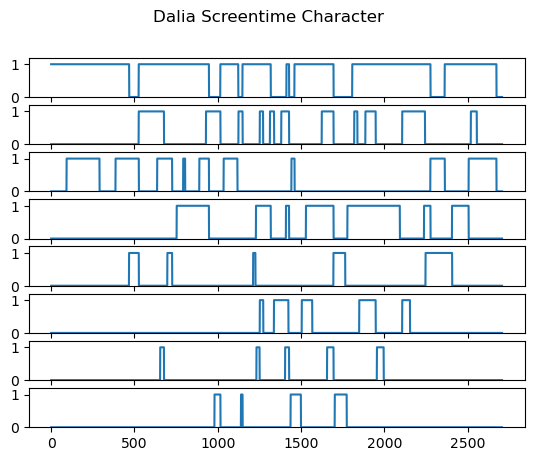

In [14]:
fig, axs = plt.subplots(8, sharex=True, sharey=True)
fig.suptitle('Character Screentime')
axs[0].plot(screentime_data['Ryan'])
axs[1].set_ylim(0, 1.2)
axs[2].plot(screentime_data['Sandy'])
axs[2].set_ylim(0, 1.2)
axs[3].plot(screentime_data['Seth'])
axs[3].set_ylim(0, 1.2)
axs[4].plot(screentime_data['Kirsten'])
axs[4].set_ylim(0, 1.2)
axs[5].plot(screentime_data['Summer'])
axs[5].set_ylim(0, 1.2)
axs[0].set_ylim(0, 1.2)
axs[1].plot(screentime_data['Marissa'])
axs[6].plot(screentime_data['Luke'])
axs[6].set_ylim(0, 1.2)
axs[7].plot(screentime_data['Jimmy'])
axs[7].set_ylim(0, 1.2)

print(fig)

### Use Function to Prep All Rater Data

In [124]:
def prep_raw_rater_data(csv_path, rater_id):

    # Import raw data
    raw_data = pd.read_csv(csv_path)

    # Drop Good clip column
    raw_data = raw_data.drop('Good_clip', axis = 1)

    # Remove spaces from character names
    raw_data['Character'] = raw_data['Character'].str.strip()

    raw_data['Episode'] = raw_data['Episode'].astype(str)

    # Calculate character screentime
    # Create empty
    character_seconds_df = pd.DataFrame(columns=["Character", "Episode", "Seconds"])
    
    # Create list of characters
    char_list = raw_data['Character'].unique()

    # Create a list of the episodes
    epi_list = raw_data['Episode'].unique()

    # For each episode and character, mark if they are on the screen
    # for a given second
    for epi in epi_list:
        # Filter data for a specific episode
        temp_epi_df = raw_data[raw_data["Episode"] == epi]

        # Create a df to store episode info
        epi_seconds_df = pd.DataFrame(columns=["Character", "Episode", "Seconds"])

        # Loop through characters to find episode specific screentime
        n=0
        for char in char_list:
            # Filter dataframe for a specific character
            temp_char_df = temp_epi_df[temp_epi_df["Character"] == char]

            # Find the total time of the clip
            temp_char_total = sum(temp_char_df['Clip_length'])
        
            # Fill in dataframe with character totals
            epi_seconds_df.loc[n,"Character"] = char
            epi_seconds_df.loc[n,"Seconds"] = temp_char_total
            n += 1

        # Add episode info
        epi_seconds_df['Episode'] = epi

        character_seconds_df = pd.merge(character_seconds_df, epi_seconds_df, how='outer')

    
    # Add a column for the rater ID
    character_seconds_df['rater'] = str(rater_id)
    

    # Find character on screen
    # Change time stamp to readable format
    ftr = [3600,60,1]

    screentime_data = pd.DataFrame(columns=np.append(char_list,'Episode'))
    
    for epi in epi_list:
        # Calculate episode length
        epi_len = raw_data['Episode_length'][0]
        total_epleng = sum([a*b for a,b in zip(ftr, map(int,epi_len.split(':')))])
        
        # Create screentime data
        epi_screentime = pd.DataFrame(columns = char_list, index = range(total_epleng))

        temp_epi_df = raw_data[raw_data["Episode"] == epi]

        # Mark in dataframe when a character is on screen for the given timepoint (second)
        for n_row in temp_epi_df.index:
            temp_char = temp_epi_df.loc[n_row,'Character']
            temp_start_idx= temp_epi_df.loc[n_row, 'Start_second']
            temp_end_idx = temp_epi_df.loc[n_row, 'End_second']
            epi_screentime.loc[temp_start_idx:temp_end_idx, temp_char] = 1
        
        epi_screentime.fillna(0, inplace = True)

        # Add the second of when the character was on screen
        epi_screentime['Second'] = epi_screentime.index

        # Add episode number
        epi_screentime['Episode'] = epi
        
        screentime_data = pd.merge(screentime_data, epi_screentime, how='outer')

    # Add a column for the rater ID
    screentime_data['Rater'] = str(rater_id)
    

    return character_seconds_df, screentime_data

### Import rater data

In [166]:
char_sec_r1, screentime_r1 = prep_raw_rater_data(os.path.join(proj_dir, 'task_creation', 
                                                              'character_time_stamps',
                                                              'ZACH- character_time_stamps.csv'), 1)
char_sec_r2, screentime_r2 = prep_raw_rater_data(os.path.join(proj_dir, 'task_creation', 
                                                              'character_time_stamps',
                                                              'SOPHIA -character_time_stamps.csv'), 2)
#char_sec_r3, screentime_r3 = prep_raw_rater_data(os.path.join(proj_dir, 'task_creation', 
#                                                              'character_time_stamps',
#                                                              'DALEXCELcharacter_time_stamps.csv'), 3)

char_sec_all = pd.merge(char_sec_r1, char_sec_r2, how='outer')
#char_sec_all = pd.merge(char_sec_all, char_sec_r3, how='outer')

screentime_all = pd.merge(screentime_r1, screentime_r2, how='outer')
#screentime_all = pd.merge(screentime_all, screentime_r3, how='outer')

/var/folders/85/t_6qbb0j2pvbbd0sq3zrwbc00000gq/T/ipykernel_81370/1848849077.py:70: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  epi_screentime.fillna(0, inplace = True)
/var/folders/85/t_6qbb0j2pvbbd0sq3zrwbc00000gq/T/ipykernel_81370/1848849077.py:70: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  epi_screentime.fillna(0, inplace = True)
/var/folders/85/t_6qbb0j2pvbbd0sq3zrwbc00000gq/T/ipykernel_81370/1848849077.py:70: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.

### Plot character total screentime

<Axes: xlabel='Character', ylabel='Seconds'>

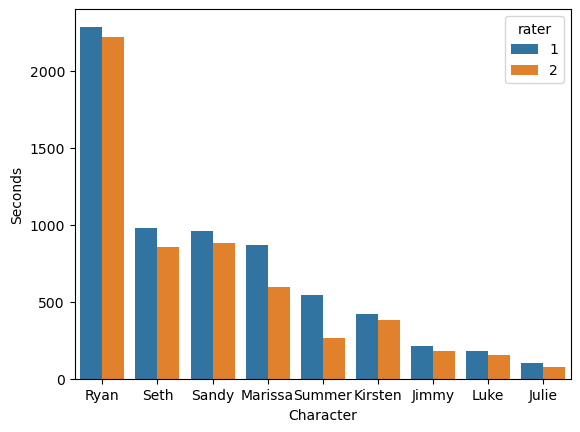

In [167]:
char_sec_all_ep01 = char_sec_all[char_sec_all['Episode'] == '1']
char_sec_all_ep01 = char_sec_all_ep01.sort_values(by = 'Seconds', ascending = False)

sns.barplot(char_sec_all_ep01, x='Character', y='Seconds', hue='Rater')

### Shared screentime

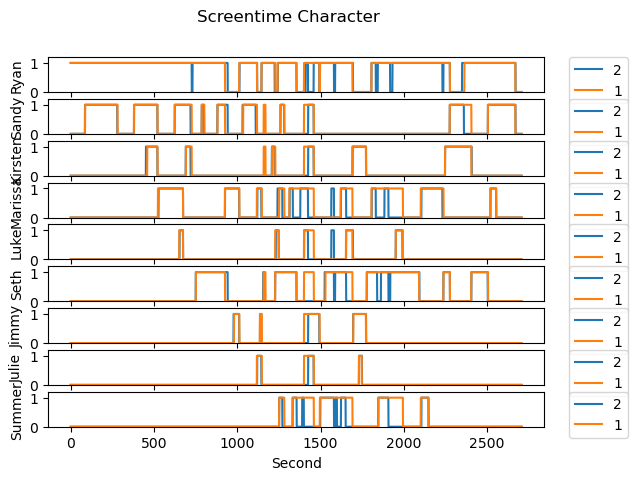

In [168]:
# Filter for episode 1
screentime_all_ep01 = screentime_all[screentime_all['Episode'] == '1']

fig, axs = plt.subplots(9, sharex=True, sharey=True)
fig.suptitle('Screentime Character')
n=0
for char in char_list:
    sns.lineplot(data = screentime_all_ep01, x= 'Second', y=char, 
                 hue = 'Rater', ax = axs[n])
    plt.ylim(0, 1.2)
    axs[n].legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    n=n+1
#print(fig)

### Find common rater coding

In [220]:
# Find common screentime for raters
screentime_com_ep01 = pd.DataFrame(columns=np.append(char_list,['Episode', 'Second']))

for t in range(screentime_all_ep01['Second'].max()+1):
    # Filter data for a single time point
    temp_second_data = screentime_all_ep01.loc[screentime_all_ep01['Second'] == t,char_list]
    
    # Sum to see if the raters agree
    temp_r_agree = temp_second_data.sum()

    # Sum to see if characters shared screen time
    temp_shared_t = np.sum(temp_r_agree)

    # Check for rater agreement and shared screentime
    if temp_shared_t == 4:  # Use 4 because two raters agree and only want two characters at a time
        temp_agree_array = temp_r_agree / len(temp_second_data)
        temp_agree_array['Episode'] = screentime_all_ep01.loc[0,'Episode']
        temp_agree_array['Second'] = t

        # Append to dataframe
        screentime_com_ep01 = pd.merge(screentime_com_ep01, pd.DataFrame(temp_agree_array).T,
                                      how='outer')

# Convert everything to intergers to get rid of rater disagreement
screentime_com_ep01 = screentime_com_ep01.astype(int)

# Sort dataframe by second
screentime_com_ep01 = screentime_com_ep01.sort_values(by=['Second'])

screentime_com_ep01.head()

,Ryan,Sandy,Kirsten,Marissa,Luke,Seth,Jimmy,Julie,Summer,Episode,Second
825,1,1,0,0,0,0,0,0,0,1,87
826,1,1,0,0,0,0,0,0,0,1,88
827,1,1,0,0,0,0,0,0,0,1,89
828,1,1,0,0,0,0,0,0,0,1,90
829,1,1,0,0,0,0,0,0,0,1,91


## Find Shared Screentime Clips

In [230]:
def find_ranges(nums):
    nums = sorted(set(nums))
    gaps = [[s, e] for s, e in zip(nums, nums[1:]) if s+1 < e]
    edges = iter(nums[:1] + sum(gaps, []) + nums[-1:])
    return list(zip(edges, edges))

In [234]:
# Use function to find consecutive seconds to create a time range
shared_time_ranges = find_ranges(screentime_com_ep01['Second'])
drop_ranges = []

# Remove time ranges that are less than 10 seconds
for n in range(len(shared_time_ranges)):
    temp_range = shared_time_ranges[n]
    if (temp_range[1] - temp_range[0]) < 10:
        drop_ranges.append(shared_time_ranges[n])

shared_time_ranges = [x for x in shared_time_ranges if x not in drop_ranges]
shared_time_ranges

[(87, 279),
 (381, 451),
 (528, 624),
 (675, 690),
 (752, 786),
 (803, 880),
 (981, 1011),
 (1036, 1110),
 (1121, 1135),
 (1209, 1223),
 (1283, 1312),
 (1460, 1492),
 (1499, 1524),
 (1697, 1730),
 (1749, 1772),
 (1995, 2091),
 (2149, 2231),
 (2277, 2349),
 (2408, 2503),
 (2506, 2518),
 (2555, 2669)]

#### Create a dictionary to store time ranges for each character pair
Only for character pairs that actually have clips

In [264]:
shared_time_dict = {}

for n_range in range(len(shared_time_ranges)):
    # Find the start and end seconds
    t_srt = shared_time_ranges[n_range][0]
    t_end = shared_time_ranges[n_range][1]

    # Find the indexes in the dataframe for the start and end times
    index_srt = screentime_com_ep01[screentime_com_ep01['Second'] == t_srt].index[0]
    index_end = screentime_com_ep01[screentime_com_ep01['Second'] == t_end].index[0]

    # Create a series for the time range
    time_range = screentime_com_ep01.loc[index_srt:index_end, char_list].sum()

    # Capture the characters
    char_pair = time_range[time_range > 0].index
    char_pair_str = char_pair[0] + ' + ' + char_pair[1]

    # If dictionary data for the character pair does not exist, create a new list
    if char_pair_str not in shared_time_dict.keys():
        shared_time_dict[char_pair_str] = []

    # Add to dictionary
    shared_time_dict[char_pair_str].append(shared_time_ranges[n_range])

### Plot total clips per character pairs

/var/folders/85/t_6qbb0j2pvbbd0sq3zrwbc00000gq/T/ipykernel_81370/2294814068.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  clips_plot.set_xticklabels(clips_plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Ryan + Sandy'),
 Text(1, 0, 'Ryan + Marissa'),
 Text(2, 0, 'Ryan + Seth'),
 Text(3, 0, 'Marissa + Jimmy'),
 Text(4, 0, 'Marissa + Julie'),
 Text(5, 0, 'Ryan + Kirsten'),
 Text(6, 0, 'Ryan + Jimmy'),
 Text(7, 0, 'Ryan + Summer'),
 Text(8, 0, 'Kirsten + Jimmy'),
 Text(9, 0, 'Sandy + Kirsten')]

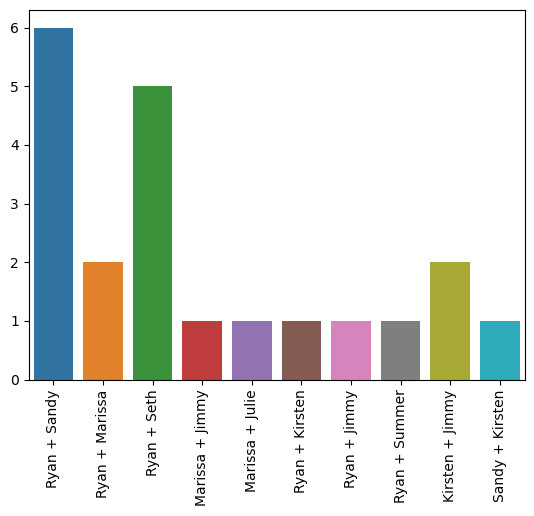

In [275]:
shared_time_plot_data = pd.DataFrame(columns=shared_time_dict.keys())

for i_key in shared_time_dict.keys():
    shared_time_plot_data.loc[0,i_key] = len(shared_time_dict[i_key])

clips_plot = sns.barplot(shared_time_plot_data)
clips_plot.set_xticklabels(clips_plot.get_xticklabels(), rotation=90)